In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from scipy.integrate import simps
from scipy.integrate import quad

Text(0.5, 1.0, 'Pulse energy vs. crater size on silicon')

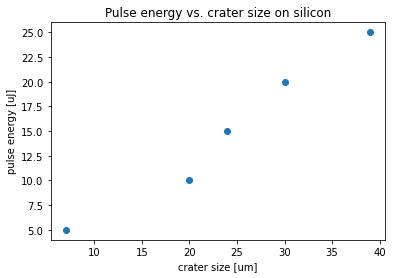

In [3]:
pulse_energy_1um = [5, 10, 15, 20, 25]
crater_size_1um = [7, 20, 24, 30, 39]
plt.scatter(crater_size_1um, pulse_energy_1um)
plt.xlabel('crater size [um]')
plt.ylabel('pulse energy [uJ]')
plt.title('Pulse energy vs. crater size on silicon')

NameError: name 'gaussian' is not defined

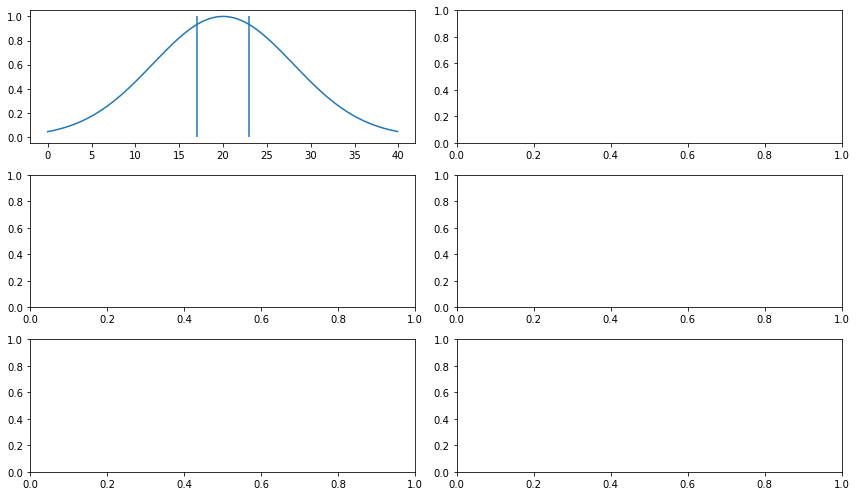

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(12,7))
mean = 20 #mu
variance = 8 #variance sigma^2
x_values = np.arange(0, 40, 0.1)
y_values = stats.norm(mean, variance)
plt.tight_layout()
#plt.plot(x_values, y_values.pdf(x_values))

axs00min = 17
axs00max = 23
axs00 = simps(y_values.pdf(x_values[170:230]), dx=0.1)
axs[0, 0].plot(x_values, y_values.pdf(x_values)/y_values.pdf(x_values).max(),
               label = 'I = '"{:.2f}".format(axs00))
axs[0, 0].vlines(axs00min, 0, 1)
axs[0, 0].vlines(axs00max, 0, 1)
hlin = gaussian(17, 20, 8)
#axs[0, 0].hlines(hlin, axs00min, axs00max)
axs[0, 0].set_title('5e-3 J')
axs[0, 0].legend()

axs01min = 15
axs01max = 25
axs01 = simps(y_values.pdf(x_values[150:250]), dx=0.08)
axs[0, 1].plot(x_values, y_values.pdf(x_values)/y_values.pdf(x_values).max(),
               'tab:orange', label = 'I = '"{:.2f}".format(axs01))
axs[0, 1].vlines(axs01min, 0, 1)
axs[0, 1].vlines(axs01max, 0, 1)
axs[0, 1].set_title('10e-3 J')
axs[0, 1].legend()

axs10min = 10
axs10max = 30
axs10 = simps(y_values.pdf(x_values[100:300]), dx=0.08)
axs[1, 0].plot(x_values, y_values.pdf(x_values)/y_values.pdf(x_values).max(),
               'tab:green', label = 'I = '"{:.2f}".format(axs10))
axs[1, 0].vlines(axs10min, 0, 1)
axs[1, 0].vlines(axs10max, 0, 1)
axs[1, 0].set_title('15e-3 J')
axs[1, 0].legend()

axs11min = 3
axs11max = 38
axs11 = simps(y_values.pdf(x_values[30:380]), dx=0.08)
axs[1, 1].plot(x_values, y_values.pdf(x_values)/y_values.pdf(x_values).max(),
               'tab:red', label = 'I = '"{:.2f}".format(axs11))
axs[1, 1].vlines(axs11min, 0, 1)
axs[1, 1].vlines(axs11max, 0, 1)
axs[1, 1].set_title('20e-3 J')
axs[1, 1].legend()

axs20min = 0
axs20max = 39
axs20 = simps(y_values.pdf(x_values[0:390]), dx=0.08)
axs[2, 0].plot(x_values, y_values.pdf(x_values)/y_values.pdf(x_values).max(),
               'tab:purple', label = 'I = '"{:.2f}".format(axs20))
axs[2, 0].vlines(axs20min, 0, 1)
axs[2, 0].vlines(axs20max, 0, 1)
axs[2, 0].set_title('25e-3 J')
axs[2, 0].legend()

axs22 = simps(y_values.pdf(x_values[0:400]), dx=0.08)*2.6
axs[2, 1].plot(x_values, y_values.pdf(x_values)/y_values.pdf(x_values).max(), 
               'tab:blue', label = 'I = '"{:.2f}".format(axs20))
axs[2, 1].plot(x_values, y_values.pdf(x_values)*2.6/y_values.pdf(x_values).max(),
               'tab:red', label = 'I = '"{:.2f}".format(axs22))
axs[2, 1].set_title('second harmonic and fundamental')
axs[2, 1].legend()

In [ ]:
def gaussian(x, mean, sigma):
    return np.exp(-np.power(x - mean, 2.) / (2 * np.power(sigma, 2.)))

In [ ]:
gaussian_area = lambda x, mean, sigma: (1/np.sqrt(2*np.pi*sigma**2.))*np.exp(-np.power(x - mean, 2.) / (2 * np.power(sigma, 2.)))

In [ ]:
quad_gauss = quad(gaussian_area, -40, 40, args = (0, 20))

In [ ]:
YVALUES_area = [gaussian_area(i, 0, 20) for i in list(range(-60, 60, 1))]

In [ ]:
YVALUES_area*2

In [ ]:
plt.plot(list(range(-60, 60, 1)), YVALUES_area, label = "{:.2f}".format(quad_gauss[0]))
plt.plot(list(range(-60, 60, 1)), YVALUES_area*2.6, label = "{:.2f}".format(quad_gauss[0]))
plt.legend()

In [ ]:
XVALUES = np.arange(0, 40, 0.1)

In [ ]:
integral_5uJ = [gaussian(i, 200, 80) for i in list(range(400))] - gaussian(170, 200, 80)
integral_10uJ = [gaussian(i, 200, 80) for i in list(range(400))] - gaussian(150, 200, 80)
integral_15uJ = [gaussian(i, 200, 80) for i in list(range(400))] - gaussian(100, 200, 80)
integral_20uJ = [gaussian(i, 200, 80) for i in list(range(400))] - gaussian(30, 200, 80)
integral_25uJ = [gaussian(i, 200, 80) for i in list(range(400))] - gaussian(0, 200, 80)
#gaussian(50, 200, 80)

In [ ]:
plt.plot(XVALUES, YVALUES)
ujinit = simps(YVALUES, XVALUES, dx=0.01)
plt.hlines(0, 30, 10)
plt.title('Total pulse energy')

In [ ]:
uj = simps(integral_5uJ[170:230], XVALUES[170:230], dx=0.01)
plt.plot(XVALUES[170:230], integral_5uJ[170:230], label = '(I)/(I)int. = ' "{:.2f}".format(uj/ujinit))
plt.hlines(0, 30, 10)
plt.title('5 uJ pulse')
plt.legend()

In [ ]:
uj2 = simps(integral_10uJ[150:250], XVALUES[150:250], dx=0.01)
plt.plot(XVALUES[150:250], integral_10uJ[150:250], label = '(I)/(I)int. = ' "{:.2f}".format(uj2/ujinit))
plt.hlines(0, 30, 10)
plt.title('10 uJ pulse')
plt.legend()

In [ ]:
uj3 = simps(integral_15uJ[100:300], XVALUES[100:300], dx=0.01)
plt.plot(XVALUES[100:300], integral_15uJ[100:300], label = '(I)/(I)int. = ' "{:.2f}".format(uj3/ujinit))
plt.hlines(0, 30, 10)
plt.title('15 uJ pulse')
plt.legend()

In [ ]:
uj4 = simps(integral_20uJ[30:380], XVALUES[30:380], dx=0.01)
plt.plot(XVALUES[30:380], integral_20uJ[30:380], label = '(I)/(I)int. = ' "{:.2f}".format(uj4/ujinit))
plt.hlines(0, 30, 10)
plt.title('20 uJ pulse')
plt.legend()

In [ ]:
uj5 = simps(integral_25uJ[0:390], XVALUES[0:390], dx=0.01)
plt.plot(XVALUES[0:390], integral_25uJ[0:390], label = '(I)/(I)int. = ' "{:.2f}".format(uj5/ujinit))
plt.hlines(0, 30, 10)
plt.title('25 uJ pulse')
plt.legend()

In [ ]:
FU = simps(y_values.pdf(x_values), dx=0.08)

In [ ]:
len(x_values[17:23])